# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(1000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
review       1000 non-null object
sentiment    1000 non-null object
dtypes: object(2)
memory usage: 15.8+ KB
None


,review,sentiment
count,1000,1000
unique,1000,2
top,"1) I am not weapon expert, but even i can see ...",positive
freq,1,501


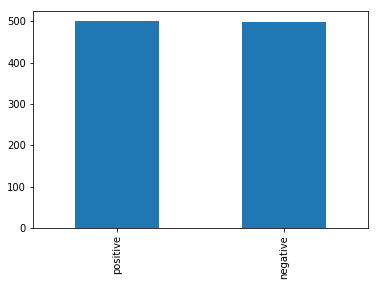

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:1000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:1000]
y_train=imdb_data.sentiment[:1000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[499   0]
 [ 21 480]]
Accuracy : 0.979
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       499
    positive       1.00      0.96      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000
 0.7708844058257185


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)
prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])

for data in range (0,len(X_test)) :
    
    if (abs(prob_sum[data])) > 0.99 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

1000
1100

Train Data= 1000 1000
Predicton from train data model ke- 1

Cross validation score: 0.7708844058257185 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       520
    positive       0.96      1.00      0.98       480

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix : 
 [[499   0]
 [ 21 480]]
Accuracy : 0.979
__________________________________________________________________________________________________
Train Data= 1000 1000
Test Data= 100 100
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80        51
    positive       0.80      0.76      0.78        49

   micro avg       0.79      0.79      0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)
    prob_sum=[]
    for data in range (0,len(prob)):
        prob_sum.append(prob[data][0]-prob[data][1])

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                if (abs(prob_sum[data])) > 0.99 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append(y)

    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

1100 1210 1067

Train Data= 1067 1067
Predicton from train data model ke- 2

Cross validation score: 0.7797650527259243 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       557
    positive       0.96      1.00      0.98       510

   micro avg       0.98      0.98      0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067


Confusion Matrix : 
 [[536   0]
 [ 21 510]]
Accuracy : 0.9803186504217432
__________________________________________________________________________________________________
Train Data= 1067 1067
Test Data= 110 110
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.68      0.87      0.76        45
    positive       0.89      0.72      0.80        65

   micro avg       0.78      0.78      0.78       110
   macro avg       0.79      0.79      0.78       110
weighted avg       0.80  


Train Data= 1531 1531
Predicton from train data model ke- 7

Cross validation score: 0.8588869970861228 
               precision    recall  f1-score   support

    negative       1.00      0.94      0.97       861
    positive       0.93      1.00      0.96       670

   micro avg       0.97      0.97      0.97      1531
   macro avg       0.97      0.97      0.97      1531
weighted avg       0.97      0.97      0.97      1531


Confusion Matrix : 
 [[813   2]
 [ 48 668]]
Accuracy : 0.9673416067929458
__________________________________________________________________________________________________
Train Data= 1531 1531
Test Data= 177 177
prediction from test data, model ke- 7
              precision    recall  f1-score   support

    negative       0.73      0.78      0.75        89
    positive       0.76      0.72      0.74        88

   micro avg       0.75      0.75      0.75       177
   macro avg       0.75      0.75      0.75       177
weighted avg       0.75      0.75      0


Train Data= 2317 2317
Predicton from train data model ke- 12

Cross validation score: 0.8943814195724114 
               precision    recall  f1-score   support

    negative       1.00      0.94      0.97      1366
    positive       0.92      1.00      0.96       951

   micro avg       0.97      0.97      0.97      2317
   macro avg       0.96      0.97      0.96      2317
weighted avg       0.97      0.97      0.97      2317


Confusion Matrix : 
 [[1288    3]
 [  78  948]]
Accuracy : 0.9650410012947778
__________________________________________________________________________________________________
Train Data= 2317 2317
Test Data= 285 285
prediction from test data, model ke- 12
              precision    recall  f1-score   support

    negative       0.74      0.85      0.79       135
    positive       0.84      0.73      0.78       150

   micro avg       0.79      0.79      0.79       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.79      0.79 

prediction from test data, model ke- 16
              precision    recall  f1-score   support

    negative       0.69      0.86      0.76      2463
    positive       0.82      0.62      0.70      2537

   micro avg       0.74      0.74      0.74      5000
   macro avg       0.75      0.74      0.73      5000
weighted avg       0.75      0.74      0.73      5000


Confusion Matrix : 
 [[2111  352]
 [ 968 1569]]
Accuracy : 0.736
__________________________________________________________________________________________________
3623 3623
4588 5046 3623

Train Data= 3623 3623
Predicton from train data model ke- 17

Cross validation score: 0.9158932797717405 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97      2246
    positive       0.92      0.99      0.96      1377

   micro avg       0.97      0.97      0.97      3623
   macro avg       0.96      0.97      0.96      3623
weighted avg       0.97      0.97      0.97      3623


Confusi

prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.68      0.87      0.76       333
    positive       0.82      0.60      0.69       338

   micro avg       0.73      0.73      0.73       671
   macro avg       0.75      0.73      0.73       671
weighted avg       0.75      0.73      0.73       671


Confusion Matrix : 
 [[289  44]
 [135 203]]
Accuracy : 0.7332339791356185
__________________________________________________________________________________________________
prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.67      0.86      0.76      2463
    positive       0.81      0.60      0.69      2537

   micro avg       0.73      0.73      0.73      5000
   macro avg       0.74      0.73      0.72      5000
weighted avg       0.74      0.73      0.72      5000


Confusion Matrix : 
 [[2115  348]
 [1024 1513]]
Accuracy : 0.7256
_________________________

# Test

In [11]:
import pprint
pp = pprint.PrettyPrinter()
    
prob=pipe.predict_proba(X_test)



prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])
    
pred=pipe.predict(X_test)

table=[]
result=[]

for i in range (0,len(X_test)) :
    if y_pred[i] == y_test[i] :
        result.append("true")

    else:
        result.append("false")
    
    table.append([result[i],pred[i],abs(prob_sum[i]),prob[i][0],prob[i][1]])

            
pp.pprint(table)
data_table=pd.DataFrame(table)
data_table
data_table.to_csv('prediction_naive_Bayes.csv')

[['true',
  'positive',
  0.9999999999904504,
  4.774722168454174e-12,
  0.9999999999952252],
 ['true',
  'negative',
  0.982277132391439,
  0.991138566195702,
  0.008861433804262997],
 ['false',
  'positive',
  0.9999999692554264,
  1.5372294168634113e-08,
  0.9999999846277207],
 ['true', 'negative', 0.9999999999999997, 1.0, 3.6558149722782927e-16],
 ['true',
  'positive',
  0.9997992669485214,
  0.00010036652575504115,
  0.9998996334742765],
 ['false',
  'negative',
  0.4322561758470515,
  0.7161280879235173,
  0.28387191207646584],
 ['true',
  'positive',
  0.99937769186626,
  0.0003111540668755853,
  0.9996888459331356],
 ['true',
  'negative',
  0.9999999978851902,
  0.9999999989425987,
  1.0574084527873028e-09],
 ['false', 'positive', 1.0, 1.385194712406671e-27, 1.0],
 ['true',
  'negative',
  0.9999999818526168,
  0.9999999909263124,
  9.073695551261221e-09],
 ['false',
  'negative',
  0.999999999955048,
  0.9999999999775184,
  2.2470460769650997e-11],
 ['true',
  'positive',
  

  'negative',
  0.9908481536032148,
  0.9954240768016059,
  0.004575923198391135],
 ['true',
  'negative',
  0.9523604155608782,
  0.976180207780445,
  0.023819792219566746],
 ['true',
  'negative',
  0.9990720654170716,
  0.9995360327085646,
  0.0004639672914929539],
 ['true',
  'positive',
  0.9096136616013722,
  0.04519316919931176,
  0.954806830800684],
 ['true',
  'positive',
  0.8343273673786599,
  0.0828363163106799,
  0.9171636836893398],
 ['true',
  'negative',
  0.9999999186878797,
  0.9999999593439391,
  4.065605941789e-08],
 ['false',
  'negative',
  0.995459817647123,
  0.9977299088235763,
  0.002270091176453261],
 ['false',
  'positive',
  0.9999999996527627,
  1.7363751927788931e-10,
  0.9999999998264002],
 ['false',
  'negative',
  0.9999999951295566,
  0.9999999975647711,
  2.4352144338986184e-09],
 ['false',
  'negative',
  0.9999999753453067,
  0.9999999876726521,
  1.2327345415312927e-08],
 ['false',
  'negative',
  0.9999695843870204,
  0.9999847921934791,
  1.5207

 ['true',
  'positive',
  0.9999999999282269,
  3.584809639670114e-11,
  0.999999999964075],
 ['false',
  'positive',
  0.9999997293284738,
  1.3533576786388881e-07,
  0.9999998646642416],
 ['true',
  'positive',
  0.9940750336619507,
  0.0029624831690224893,
  0.9970375168309732],
 ['false', 'negative', 1.0, 1.0, 4.930588226680171e-36],
 ['true',
  'negative',
  0.9951389215718137,
  0.9975694607859285,
  0.002430539214114733],
 ['true',
  'negative',
  0.999999999999784,
  0.9999999999998863,
  1.0234413041315812e-13],
 ['false',
  'negative',
  0.9999999989868615,
  0.9999999994934115,
  5.065499514444165e-10],
 ['false',
  'negative',
  0.999999946322509,
  0.9999999731612664,
  2.6838757472990793e-08],
 ['true',
  'positive',
  0.5765206692082752,
  0.21173966539586894,
  0.7882603346041441],
 ['true', 'negative', 1.0, 1.0, 7.275740368461873e-26],
 ['true',
  'positive',
  0.9999999977769787,
  1.11150511187129e-09,
  0.9999999988884838],
 ['false',
  'negative',
  0.9999796969207

  'positive',
  0.9999998580975258,
  7.095120343183037e-08,
  0.9999999290487293],
 ['true',
  'positive',
  0.9999999973028024,
  1.348587434721283e-09,
  0.9999999986513899],
 ['true',
  'negative',
  0.9999963004062941,
  0.9999981502031743,
  1.8497968802105935e-06],
 ['true',
  'negative',
  0.9999695042136153,
  0.9999847521068033,
  1.5247893188014002e-05],
 ['true', 'positive', 0.9999999999999981, 1.8594518046114485e-15, 1.0],
 ['true', 'negative', 0.9999999999999999, 1.0, 1.0207269711270123e-16],
 ['true',
  'negative',
  0.9998876433932794,
  0.999943821696634,
  5.61783033545981e-05],
 ['true',
  'negative',
  0.999409012995179,
  0.999704506497585,
  0.00029549350240603835],
 ['true',
  'positive',
  0.9999999608262423,
  1.9586879957086224e-08,
  0.9999999804131223],
 ['false', 'positive', 1.0, 2.4233261447558976e-26, 1.0],
 ['true',
  'negative',
  0.7985094068263696,
  0.8992547034131473,
  0.10074529658677761],
 ['true',
  'positive',
  0.9999997784161977,
  1.10791892

  'positive',
  0.999998388547259,
  8.057263660736859e-07,
  0.999999194273625],
 ['false',
  'positive',
  0.2432106572092021,
  0.37839467139540284,
  0.6216053286046049],
 ['true',
  'negative',
  0.9999849432916499,
  0.9999924716458128,
  7.52835416296893e-06],
 ['true',
  'negative',
  0.9999999999949969,
  0.9999999999974989,
  2.5020511939908985e-12],
 ['true',
  'positive',
  0.9999993213997472,
  3.393001240620569e-07,
  0.9999996606998713],
 ['false', 'positive', 0.9999999999999883, 1.1673988252928109e-14, 1.0],
 ['true',
  'positive',
  0.6099823001483589,
  0.1950088499258144,
  0.8049911500741732],
 ['false',
  'negative',
  0.999999999057436,
  0.9999999995287112,
  4.712752575513587e-10],
 ['true',
  'negative',
  0.9999999999991336,
  0.9999999999995453,
  4.117234056527687e-13],
 ['true',
  'negative',
  0.9996274802222331,
  0.9998137401111377,
  0.0001862598889045229],
 ['false',
  'positive',
  0.9999832134885794,
  8.393255689476984e-06,
  0.9999916067442689],
 [

In [12]:
print("Fnal Model")

pipe.fit(X_train,y_train)


y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")



len(X_train)

Fnal Model
prediction from test data, model ke- 26
              precision    recall  f1-score   support

    negative       0.66      0.85      0.74      2463
    positive       0.80      0.58      0.67      2537

   micro avg       0.71      0.71      0.71      5000
   macro avg       0.73      0.71      0.71      5000
weighted avg       0.73      0.71      0.71      5000


Confusion Matrix : 
 [[2094  369]
 [1070 1467]]
Accuracy : 0.7122
__________________________________________________________________________________________________


7929

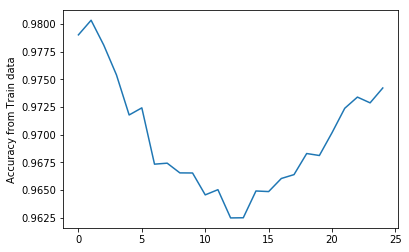

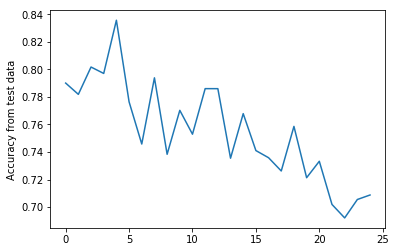

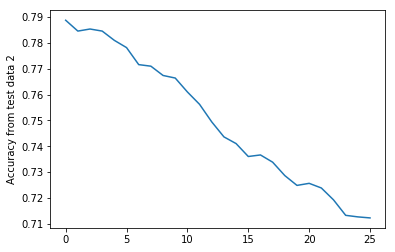

In [13]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()


In [14]:
len(X_train)

7929